# Environment preparation

In [ ]:
# Cargamos las librerías necesarias
#import numpy as np #librería para manejo numérico
#import pandas as pd #librería para gestión de tablas
#import matplotlib.pyplot as plt #librería para gráficos simples
#from sklearn.preprocessing import MinMaxScaler, LabelEncoder
#from sklearn.linear_model import LinearRegression
#from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_squared_error, r2_score 
#from sklearn.tree import DecisionTreeRegressor, export_text
#from sklearn.model_selection import RandomizedSearchCV, train_test_split, GridSearchCV
#from sklearn.ensemble import RandomForestRegressor

In [3]:
# Replace 'your_file.xlsx' with the path to your Excel file
file_path = r"C:\Users\Usuario\Desktop\Jupyter notebooks\Datos_ventas.xlsx"

# Read the Excel file into a pandas DataFrame
df=pd.read_excel(file_path)

# Display the first few rows of the DataFrame
print(df.head())

   Edad  Ingreso Compra     Producto  Productos Comprados  \
0    58  73033.0     Sí        Hogar                    2   
1    48  48599.0     No         Ropa                    5   
2    34  60222.0     Sí  Electrónica                    4   
3    27  36837.0     No         Ropa                    1   
4    40  39039.0     No         Ropa                    5   

   Tiempo de Navegación  
0                    80  
1                    13  
2                    75  
3                    32  
4                    82  


# preprocessing

In [ ]:
# Visualizamos la información de la data
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Edad                  100 non-null    int64  
 1   Ingreso               99 non-null     float64
 2   Compra                100 non-null    object 
 3   Producto              99 non-null     object 
 4   Productos Comprados   100 non-null    int64  
 5   Tiempo de Navegación  100 non-null    int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 4.8+ KB


,Edad,Ingreso,Productos Comprados,Tiempo de Navegación
count,100.00000,99.000000,100.000000,100.00000
mean,38.94000,50655.393939,2.960000,60.52000
std,11.78153,14717.362399,1.462805,33.50787
min,20.00000,25206.000000,1.000000,5.00000
25%,28.00000,38906.000000,2.000000,31.75000
50%,39.50000,50446.000000,3.000000,61.50000
75%,47.25000,63988.000000,4.000000,89.25000
max,60.00000,74850.000000,5.000000,118.00000


In [10]:
df=df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 98 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Edad                  98 non-null     int64  
 1   Ingreso               98 non-null     float64
 2   Compra                98 non-null     object 
 3   Producto              98 non-null     object 
 4   Productos Comprados   98 non-null     int64  
 5   Tiempo de Navegación  98 non-null     int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 5.4+ KB


In [12]:
# Create a copy of the original DataFrame
df_encoded=df.copy()

# One-hot encode 'Compre' and 'Producto' columns
df_encoded=pd.get_dummies(df_encoded, columns=['Compra', 'Producto'], prefix=['Compra', 'Producto'])

# Display the first few rows of the encoded DataFrame
print(df_encoded.head())

   Edad  Ingreso  Productos Comprados  Tiempo de Navegación  Compra_No  \
0    58  73033.0                    2                    80      False   
1    48  48599.0                    5                    13       True   
2    34  60222.0                    4                    75      False   
3    27  36837.0                    1                    32       True   
4    40  39039.0                    5                    82       True   

   Compra_Sí  Producto_Alimentos  Producto_Deportes  Producto_Electrónica  \
0       True               False              False                 False   
1      False               False              False                 False   
2       True               False              False                  True   
3      False               False              False                 False   
4      False               False              False                 False   

   Producto_Hogar  Producto_Ropa  
0            True          False  
1           False     

La regresion lineal es un modelo que requiere que sus variables esten estandarizadas, es importante revisar la distribución de la varia le objetivo para identificar que tipo de estandarización aplicar.

<Axes: >

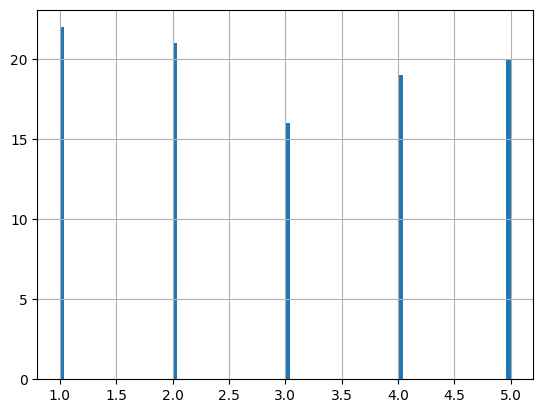

In [ ]:
# Calculamos el cuartil 1
Q1 = datos['Productos Comprados'].quantile(0.25)
# Calculamos el cuartil 3
Q3 = datos['Productos Comprados'].quantile(0.75)
# Calculamos el rango intercuartil
RIQ = Q3 - Q1
# Definimos el límite superior
upper_limit = 1.5*RIQ +   Q3
# Filtramos las filas
data_train_sin_outliers = datos[datos['Productos Comprados']<=upper_limit]
# Visualizamos el resultado
data_train_sin_outliers['Productos Comprados'].hist(bins = 100)

In [16]:
# Create a MinMaxScaler object
scaler=MinMaxScaler()

# Select the columns you want to scale
columns_to_scale=['Edad', 'Ingreso', 'Tiempo de Navegación']

# Fit the scaler to your data and transform the selected columns
data_train_sin_outliers[columns_to_scale]=scaler.fit_transform(data_train_sin_outliers[columns_to_scale])

# Display the scaled data
print(data_train_sin_outliers.head())

    Edad   Ingreso Compra     Producto  Productos Comprados  \
0  0.950  0.963399     Sí        Hogar                    2   
1  0.700  0.471215     No         Ropa                    5   
2  0.350  0.705342     Sí  Electrónica                    4   
3  0.175  0.234288     No         Ropa                    1   
4  0.500  0.278644     No         Ropa                    5   

   Tiempo de Navegación  
0              0.663717  
1              0.070796  
2              0.619469  
3              0.238938  
4              0.681416  


# Regresion lineal

Revisamos la correlación entre las variables para detectar aquellas variable que pueda funcionar como independiente y que explique a la variable objetivo *"Productos comprados"*

In [18]:
# Calculate the correlation matrix
correlation_matrix = df_encoded.corr()

# Get the correlations with 'Productos Comprados'
correlation_with_products = correlation_matrix['Productos Comprados'].sort_values(ascending=False)

# Print the correlations
correlation_with_products

Productos Comprados     1.000000
Producto_Alimentos      0.073221
Producto_Deportes       0.056087
Tiempo de Navegación    0.044540
Ingreso                 0.020509
Compra_No               0.002090
Compra_Sí              -0.002090
Producto_Hogar         -0.027060
Producto_Ropa          -0.036826
Edad                   -0.063529
Producto_Electrónica   -0.070570
Name: Productos Comprados, dtype: float64

In [ ]:
#Establecemos las variable objetivo y la predictore
X = df_encoded[['Tiempo de Navegación']]
print(X.shape)
y = df_encoded['Productos Comprados']
print(y.shape)

(98, 1)
(98,)


In [26]:
# Instanciamos el modelo
modelo = LinearRegression(fit_intercept=True)
# Entrenamos el modelo
modelo.fit(X, y)

LinearRegression()

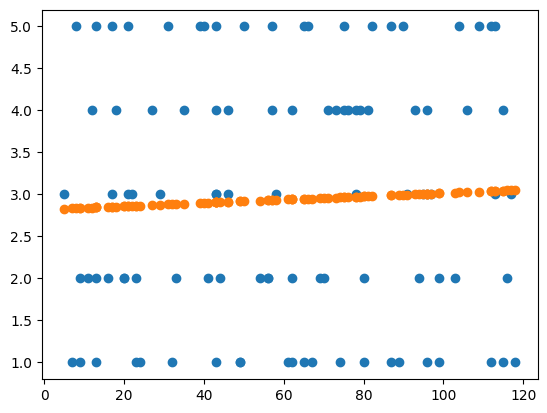

In [27]:
# Graficamos el modelo
y_pred = modelo.predict(X)
plt.scatter(X, y);
plt.scatter(X, y_pred);

In [ ]:
#Revisamos el R^2 del modelo
X_test = df_encoded[['Tiempo de Navegación']]
y_test = df_encoded['Productos Comprados']
R_rl=modelo.score(X_test, y_test)
print(f" El R^2 del modelo de regresion lineal es:", R_rl)

#Revisamos el MSE del modelo
y_pred_test = modelo.predict(X_test)
mse = mean_squared_error(y_test, y_pred_test)

print(f"Mean Squared Error (MSE) del modelo de regresion lineal es: {mse}")

 El R^2 del modelo de regresion lineal es: 0.00198380908614737
Mean Squared Error (MSE): 2.11449744405613


# Arboles de decisión - Regresion 

In [37]:
# Particionamos los datos en train y test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=73)

In [45]:
#Revisamos el R^2 
best_score=grid_search.best_score_
print("El R^2 del modelo de arbol de regression es", best_score )

El R^2 del modelo de arbol de regression es -0.37866223714279174


In [47]:
grid_search.best_params_

{'max_depth': np.int64(3), 'min_samples_leaf': np.int64(9)}

In [ ]:
grid = {'max_depth': np.arange(3,8), 'min_samples_leaf': np.arange(5,10)}
grid_search = GridSearchCV(estimator = DecisionTreeRegressor(), param_grid = grid, scoring = 'r2', cv = 5)

# Encode y_train if it's categorical
# Assuming 'Productos Comprados' is the target variable and needs encoding
encoder = LabelEncoder()
y_train_codificado = encoder.fit_transform(y_train) # Create y_train_codificado

# Entrenamos la sintonización
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': array([3, 4, 5, 6, 7]),
                         'min_samples_leaf': array([5, 6, 7, 8, 9])},
             scoring='r2')

In [46]:
# Instanciamos el modelo de regresión
modelo = DecisionTreeRegressor(random_state=10)
# Entrenamos el modelo
modelo.fit(X_train, y_train)

DecisionTreeRegressor(random_state=10)

In [52]:
# Revisamos el error en la regresión
print(f'El error para el entrenamiento es: {root_mean_squared_error(y_train, modelo.predict(X_train))}')
print(f'El error para el test es: {root_mean_squared_error(y_test, modelo.predict(X_test))}')

El error para el entrenamiento es: 0.7052913564165503
El error para el test es: 2.153485546735803


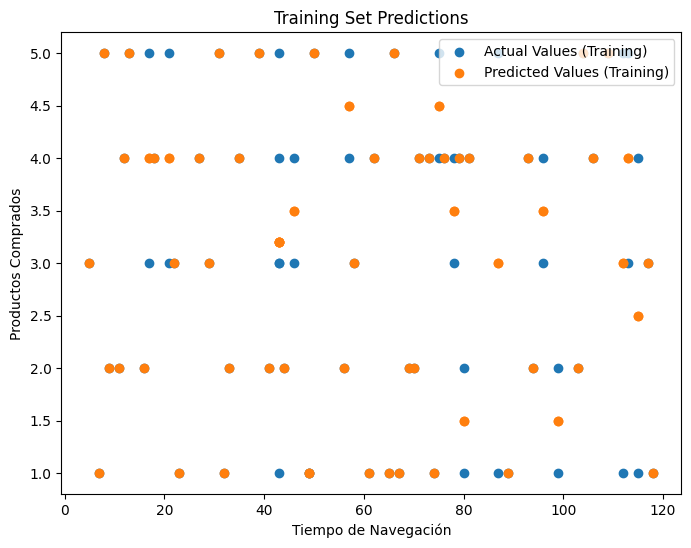

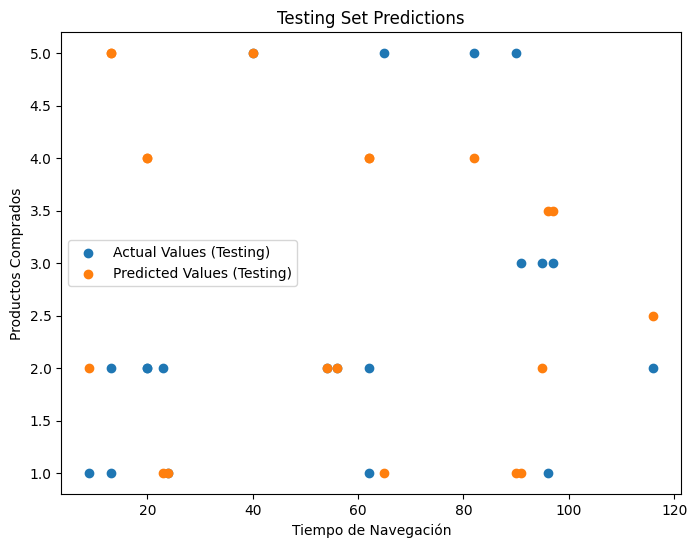

In [53]:
#Graficamos el comportamiento del modelo
# Predictions for training set
y_pred_train = modelo.predict(X_train)

# Predictions for testing set
y_pred_test = modelo.predict(X_test)

# Plotting the training set results
plt.figure(figsize=(8, 6))
plt.scatter(X_train, y_train, label='Actual Values (Training)')
plt.scatter(X_train, y_pred_train, label='Predicted Values (Training)')
plt.xlabel('Tiempo de Navegación')
plt.ylabel('Productos Comprados')
plt.title('Training Set Predictions')
plt.legend()
plt.show()

# Plotting the testing set results
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, label='Actual Values (Testing)')
plt.scatter(X_test, y_pred_test, label='Predicted Values (Testing)')
plt.xlabel('Tiempo de Navegación')
plt.ylabel('Productos Comprados')
plt.title('Testing Set Predictions')
plt.legend()
plt.show()

In [56]:
# Revisamos la estructura del árbol
arbol = export_text(modelo, feature_names= list(X.columns.values))
print(arbol)

|--- Tiempo de Navegación <= 117.50
|   |--- Tiempo de Navegación <= 103.50
|   |   |--- Tiempo de Navegación <= 97.50
|   |   |   |--- Tiempo de Navegación <= 7.50
|   |   |   |   |--- Tiempo de Navegación <= 6.00
|   |   |   |   |   |--- value: [3.00]
|   |   |   |   |--- Tiempo de Navegación >  6.00
|   |   |   |   |   |--- value: [1.00]
|   |   |   |--- Tiempo de Navegación >  7.50
|   |   |   |   |--- Tiempo de Navegación <= 21.50
|   |   |   |   |   |--- Tiempo de Navegación <= 8.50
|   |   |   |   |   |   |--- value: [5.00]
|   |   |   |   |   |--- Tiempo de Navegación >  8.50
|   |   |   |   |   |   |--- Tiempo de Navegación <= 11.50
|   |   |   |   |   |   |   |--- value: [2.00]
|   |   |   |   |   |   |--- Tiempo de Navegación >  11.50
|   |   |   |   |   |   |   |--- Tiempo de Navegación <= 14.50
|   |   |   |   |   |   |   |   |--- Tiempo de Navegación <= 12.50
|   |   |   |   |   |   |   |   |   |--- value: [4.00]
|   |   |   |   |   |   |   |   |--- Tiempo de Navegación >

# Modelo de ensamble

In [61]:
#Instanciamos el modelo
ensamble = RandomForestRegressor(n_estimators = 100, random_state = 27)

#Entrenamos el ensamble
ensamble.fit(X_train, y_train)

# Evaluate the model using regression metrics
y_pred_train = ensamble.predict(X_train)
y_pred_test = ensamble.predict(X_test)

# Calculate and print regression metrics
print(f"Training MSE: {mean_squared_error(y_train, y_pred_train)}")
print(f"Testing MSE: {mean_squared_error(y_test, y_pred_test)}")
print(f"Training R-squared: {r2_score(y_train, y_pred_train)}")
print(f"Testing R-squared: {r2_score(y_test, y_pred_test)}")

Training MSE: 0.8852770516957472
Testing MSE: 3.056241787368532
Training R-squared: 0.5784263006796394
Testing R-squared: -0.5673034807018114


In [ ]:
#Graficamos el comportamiento del modelo

import matplotlib.pyplot as plt
# Plotting the training set results for the ensemble model
plt.figure(figsize=(8, 6))
plt.scatter(X_train, y_train, label='Actual Values (Training)')
plt.scatter(X_train, y_pred_train, label='Predicted Values (Training)')
plt.xlabel('Tiempo de Navegación')
plt.ylabel('Productos Comprados')
plt.title('Ensemble Model - Training Set Predictions')
plt.legend()
plt.show()

# Plotting the testing set results for the ensemble model
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, label='Actual Values (Testing)')
plt.scatter(X_test, y_pred_test, label='Predicted Values (Testing)')
plt.xlabel('Tiempo de Navegación')
plt.ylabel('Productos Comprados')
plt.title('Ensemble Model - Testing Set Predictions')
plt.legend()
plt.show()

# Analisis
Identificamos que los datos no tienen una distribución que permita predecir de forma lineal, consideramos que el problema es de clasificación y no de regresión, a pesar de que contamos con cantidades en la variable objetivo, de acuerdo al contexto, se pueden tomar como valores discretos y ser clases. Los resultados obtenidos para

Regresión Lineal
R2: 0.0035875275887071734
MSE: 2.110800181556083

Arbol
R2: -0.37866223714279174
El error para el entrenamiento es: 0.7052913564165503
El error para el test es: 2.153485546735803

Ensamble
Training MSE: 0.8852770516957472
Testing MSE: 3.056241787368532
Training R-squared: 0.5784263006796394
Testing R-squared: -0.5673034807018114

Con base a esto, el mejor resultado es el Árbol de Decisión, ya que tuvo mejor rendimiento y un error más bajo.
